In [23]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pylab as plt
import config as cf

from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from chinese_calendar import is_workday, is_holiday
from jupyterthemes import jtplot
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

jtplot.style()
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200

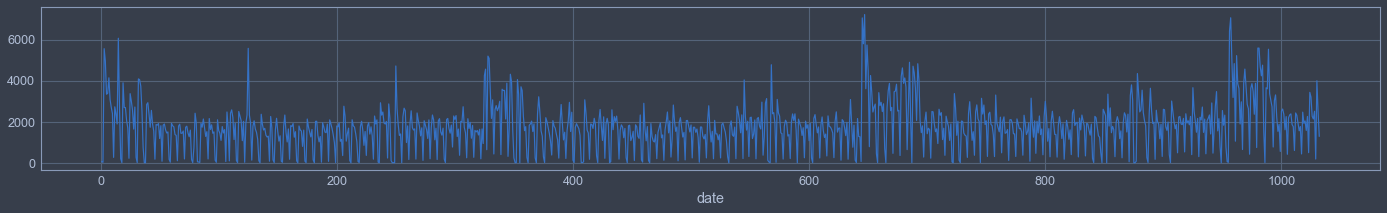

In [24]:
plt.figure(figsize=(24,3))
train.groupby('date').sum()['cnt'].plot()

In [25]:
train = pd.read_csv(cf.train_file_path, sep='\t')
test = pd.read_csv(cf.testA_file_path, sep='\t')

train_by_brand = train.groupby('brand').sum()

In [26]:
train_by_brand['25%'] = 221
train_by_brand['50%'] = 351
train_by_brand['75%'] = 496
train_by_brand['median'] = train_by_brand['cnt'].median()
train_by_brand['mean'] = train_by_brand['cnt'].mean()
print(mean_squared_error(train_by_brand['cnt'],train_by_brand['25%']))
print(mean_squared_error(train_by_brand['cnt'],train_by_brand['50%']))
print(mean_squared_error(train_by_brand['cnt'],train_by_brand['75%']))
print(mean_squared_error(train_by_brand['cnt'],train_by_brand['median']))
print(mean_squared_error(train_by_brand['cnt'],train_by_brand['mean']))

133773916772.0
133679535836.0
133574304667.0
2646661712.6
1955108465.84


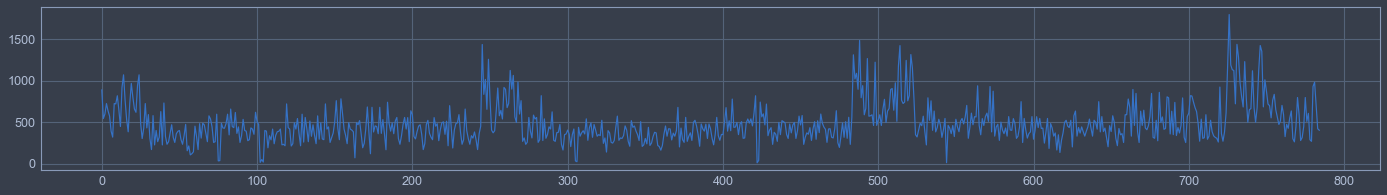

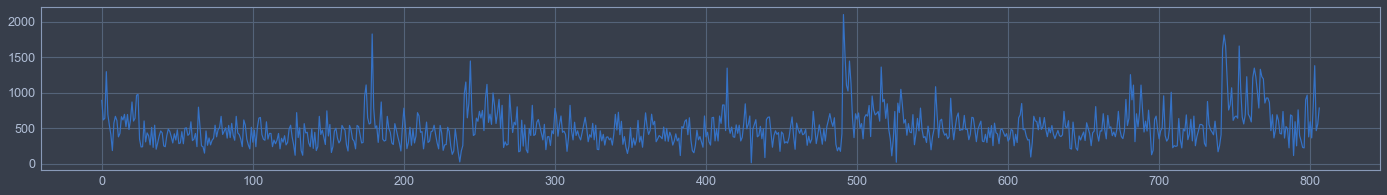

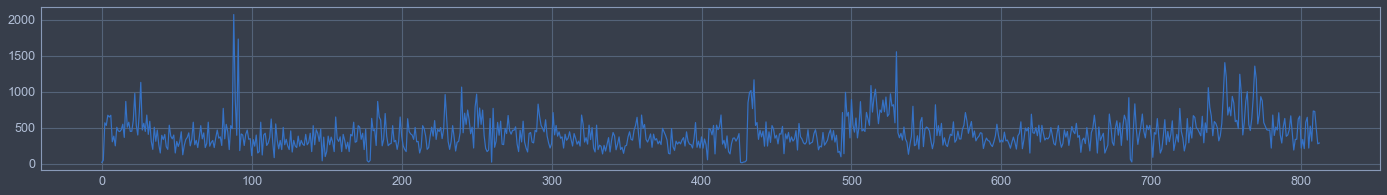

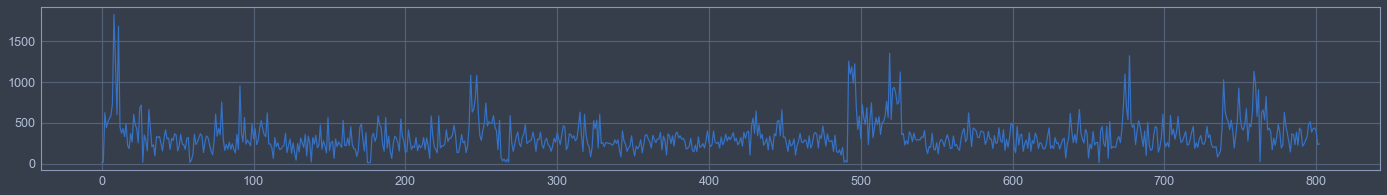

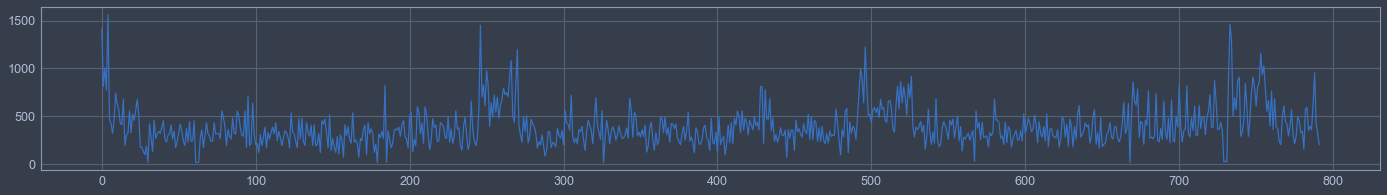

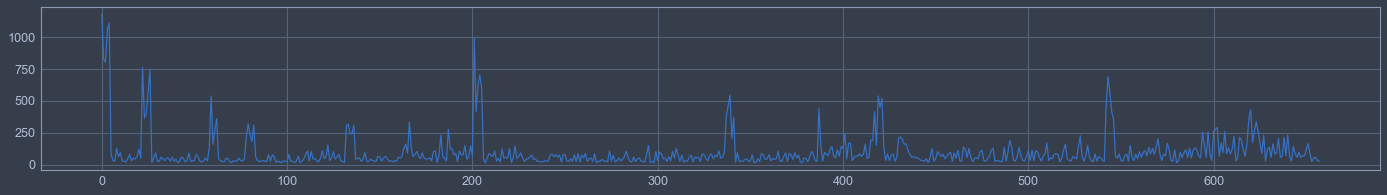

In [27]:
for i in range(1, 7):
    monday = train[train['day_of_week']==i]
    plt.figure(figsize=(24,3))
    plt.plot(range(len(monday)),monday['cnt'])
    plt.show()

In [28]:
res = train.groupby(['day_of_week'],as_index=False).cnt.mean()
xx = train.merge(res,on=['day_of_week'])
print(xx.head())
print(mean_squared_error(xx['cnt_x'],xx['cnt_y']))

   date  day_of_week  brand  cnt_x       cnt_y
0     1            3      1     20  425.141451
1     1            3      5     48  425.141451
2     8            3      1    569  425.141451
3     8            3      2    532  425.141451
4     8            3      3    674  425.141451
48035.0908982
